# ОИАД. Лабораторная работа №2


### Цель работы
Изучить различные методы анализа зависимости между двумя признаками — корреляционные и регрессионные методы. Рассчитать коэффициенты корреляции (Фехнера, Пирсона, Спирмена, Кенделла) и построить уравнения регрессии (линейную, квадратичную, гиперболическую и показательную), проверить их значимость с помощью критерия Фишера.


### Входные данные
Датасет: **datasets/students_simple.csv**

Номер в списке: **1**


Выбор столбцов:
$$ 1. \ N \% 5, $$
$$ 2. \ N^2 \% 5 + 5 $$
где $ N = 1 $.

## 1. Корреляции


### Теория


#### Корреляция Фехнера
Рассматриваются знаки отклонений наблюдений от среднего $ sign(x_i - \overline{x}) $ и $ sign(y_i - \overline{y}) $.


При расчёте корреляции вычисляется число совпадающих знаков минус число не совпадающих:
$$
K = \frac{\sum_{i=1}^{n} [sign(x_i - \overline{x}) = sign(y_i - \overline{y})] - [sign(x_i - \overline{x}) \ne sign(y_i - \overline{y})]}{n}
$$


#### Корреляция Пирсона
$$
cov = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{n - 1}, \quad
K = \frac{cov}{S_x S_y}
$$


Где $ S_x^2 = \frac{\sum_{i=1}^{n}(x_i - \overline{x})^2}{n - 1} $.


Проверка значимости:
$$
T = \frac{K \sqrt{n-2}}{\sqrt{1 - K^2}}
$$


#### Корреляция Спирмена
$$
K = 1 - \frac{6}{n (n-1)(n+1)} \sum_{i=1}^{n} (R(x_i) - R(y_i))^2
$$


#### Корреляция Кенделла
$$
K = 1 - \frac{4}{n (n-1)} \sum_{i=1}^{n-1} \sum_{j=i+1}^{n} [[x_i < x_j] \ne [y_i < y_j]]
$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


df = pd.read_csv('../datasets/students_simple.csv')

N = 1
col1_idx = N % 5
col2_idx = (N**2) % 5 + 5

cols = list(df.columns)
col1 = cols[col1_idx - 1]
col2 = cols[col2_idx - 1]

x = pd.to_numeric(df[col1], errors='coerce').dropna().values
y = pd.to_numeric(df[col2], errors='coerce').dropna().values
n = min(len(x), len(y))
x, y = x[:n], y[:n]

# Корреляция Фехнера
def fechner_corr(x, y):
    sx = np.sign(x - np.mean(x))
    sy = np.sign(y - np.mean(y))
    same = np.sum(sx == sy)
    diff = np.sum(sx != sy)
    return (same - diff) / len(x)

K_fechner = fechner_corr(x, y)

# Корреляция Пирсона
r_pearson, p_pearson = stats.pearsonr(x, y)

# Доверительный интервал Пирсона
z = np.arctanh(r_pearson)
se = 1 / np.sqrt(n - 3)
z_crit = stats.norm.ppf(0.975)
ci = np.tanh([z - z_crit*se, z + z_crit*se])

# Спирмен
r_spearman, p_spearman = stats.spearmanr(x, y)

# Кенделл
r_kendall, p_kendall = stats.kendalltau(x, y)

print('Фехнер:', K_fechner)
print('Пирсон:', r_pearson, 'p=', p_pearson, 'CI=', ci)
print('Спирмен:', r_spearman)
print('Кенделл:', r_kendall)

Фехнер: 0.1
Пирсон: 0.1943745514086799 p= 0.4115474738488909 CI= [-0.27149917  0.58645181]
Спирмен: 0.17502306934034584
Кенделл: 0.12229018009359618


## 2. Визуализация

- **Гистограммы** распределений переменных;
- **График рассеяния (scatter plot)** — для визуальной оценки связи между признаками.

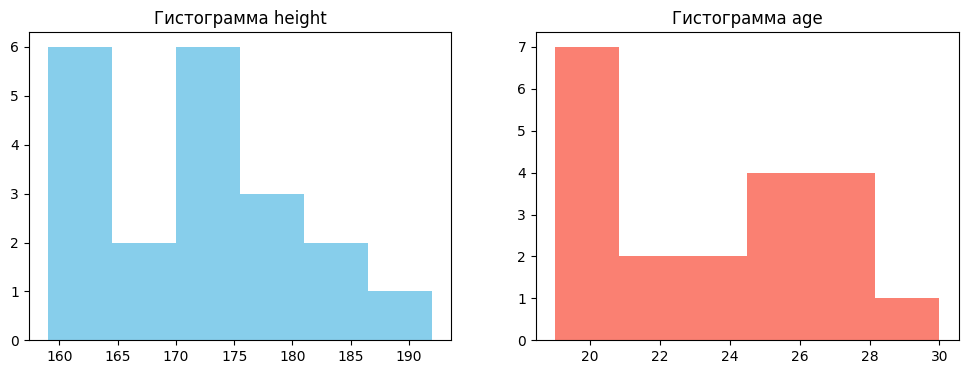

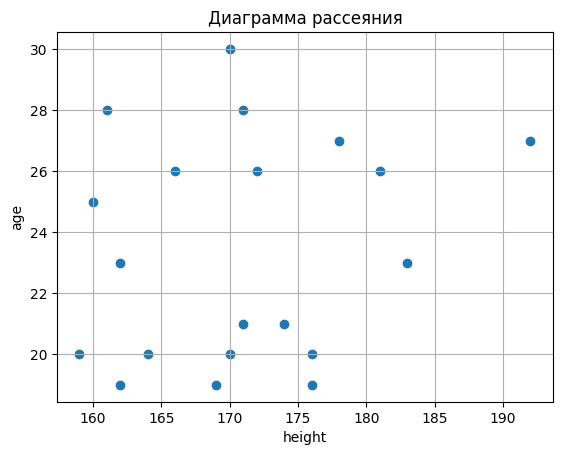

In [4]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.hist(x, bins='auto', color='skyblue')
plt.title(f'Гистограмма {col1}')
plt.subplot(1,2,2)
plt.hist(y, bins='auto', color='salmon')
plt.title(f'Гистограмма {col2}')
plt.show()


plt.scatter(x, y)
plt.title('Диаграмма рассеяния')
plt.xlabel(col1)
plt.ylabel(col2)
plt.grid(True)
plt.show()



## 3. Уравнение регрессии

Регрессия — задача восстановления зависимости $ y = f(x) $ по наблюдениям.
Используется **метод наименьших квадратов (МНК)**:
$$
Q(w) = \sum_{i=1}^{n} (y_i - \hat{y}(x_i, w))^2 \to \min_w
$$


**Линейная модель:** $ y = w_1 x + w_0 $

**Квадратичная:** $ y = w_2 x^2 + w_1 x + w_0 $

**Гиперболическая:** $ y = \frac{w_1}{x} + w_0 $

**Показательная:** $ y = w_0 w_1^x $

R2 линейная: 0.037781466235325634
R2 квадратичная: 0.05589790603888867
R2 гиперболическая: 0.03468324575905268
R2 показательная: 0.03877613895923537


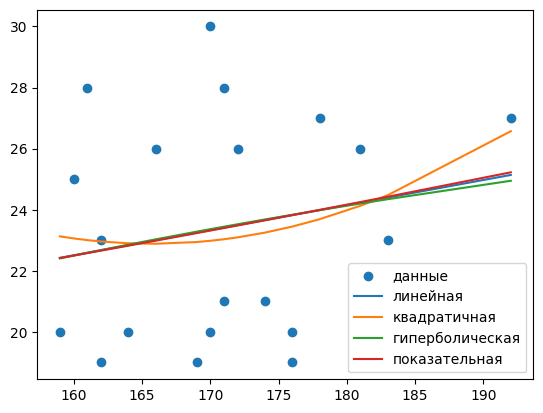

In [ ]:
def r2(y, y_pred):
    return 1 - np.sum((y - y_pred)**2)/np.sum((y - np.mean(y))**2)

# Линейная
coeffs_lin = np.polyfit(x, y, 1)
y_lin = np.polyval(coeffs_lin, x)
R2_lin = r2(y, y_lin)

# Квадратичная
coeffs_quad = np.polyfit(x, y, 2)
y_quad = np.polyval(coeffs_quad, x)
R2_quad = r2(y, y_quad)

# Гиперболическая
def hyp(x, a, b):
    return a/x + b
from scipy.optimize import curve_fit
popt_hyp, _ = curve_fit(hyp, x, y, maxfev=10000)
y_hyp = hyp(x, *popt_hyp)
R2_hyp = r2(y, y_hyp)

# Показательная
def expo(x, a, b):
    return a * (b ** x)
popt_exp, _ = curve_fit(expo, x, y, maxfev=10000)
y_exp = expo(x, *popt_exp)
R2_exp = r2(y, y_exp)

print('R2 линейная:', R2_lin)
print('R2 квадратичная:', R2_quad)
print('R2 гиперболическая:', R2_hyp)
print('R2 показательная:', R2_exp)

plt.scatter(x, y, label='данные')
plt.plot(x, y_lin, label='линейная')
plt.plot(x, y_quad, label='квадратичная')
plt.plot(x, y_hyp, label='гиперболическая')
plt.plot(x, y_exp, label='показательная')
plt.legend()
plt.show()

## 4. Проверка уравнения регрессии

Коэффициент детерминации:
$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \overline{y})^2}
$$


Проверка значимости уравнения регрессии проводится по критерию Фишера:
$$
F = \frac{R^2}{1 - R^2} \cdot \frac{n - k}{k - 1}
$$


Где $ k $ — число параметров модели.

In [7]:
from scipy.stats import f


def f_test(y, y_pred, k):
    R2 = r2(y, y_pred)
    F = (R2 / (1 - R2)) * ((len(y) - k) / (k - 1))
    p = 1 - f.cdf(F, k - 1, len(y) - k)
    return F, p


for name, (pred, k) in {'Линейная':(y_lin,2),'Квадратичная':(y_quad,3),'Гиперболическая':(y_hyp,2),'Показательная':(y_exp,2)}.items():
    F, p = f_test(y, pred, k)
    print(f'{name}: F={F:.3f}, p={p:.5f}')

Линейная: F=0.707, p=0.41155
Квадратичная: F=0.503, p=0.61328
Гиперболическая: F=0.647, p=0.43178
Показательная: F=0.726, p=0.40534


## Выводы

### 1. Анализ корреляций

Рассмотрим результаты вычислений коэффициентов корреляции:

| Вид корреляции | Значение | Интерпретация |
|----------------|-----------|---------------|
| **Фехнера** | 0.1 | Слабая положительная зависимость по направлению отклонений |
| **Пирсона** | 0.194 | Очень слабая линейная зависимость |
| **Спирмена** | 0.175 | Слабая монотонная (ранговая) зависимость |
| **Кенделла** | 0.122 | Очень слабая согласованность рангов |

Все коэффициенты находятся в диапазоне **0.1–0.2**, что указывает на **очень слабую положительную связь** между признаками.  
Значение *p* для корреляции Пирсона (`p = 0.4115 > 0.05`) показывает, что корреляция **статистически незначима**, то есть нельзя отвергнуть гипотезу $H_0: K = 0$.  
Доверительный интервал $[-0.27;\;0.59]$ включает 0, что подтверждает вывод о незначимости корреляции.  

**Вывод:** связь между выбранными признаками существует лишь на уровне случайных колебаний, выраженной зависимости нет.

---

### 2. Анализ моделей регрессии

| Модель | Формула | $R^2$ | Интерпретация |
|--------|----------|----------|---------------|
| Линейная | $y = w_1x + w_0$ | 0.0378 | Очень слабое объяснение дисперсии |
| Квадратичная | $y = w_2x^2 + w_1x + w_0$ | **0.0559** | Немного лучше, но также слабая зависимость |
| Гиперболическая | $y = \frac{w_1}{x} + w_0$ | 0.0347 | Худший результат |
| Показательная | $y = w_0 w_1^x$ | 0.0388 | Почти как линейная |

Наилучшей оказалась **квадратичная модель** ($R^2 = 0.0559$),  
наихудшей — **гиперболическая** ($R^2 = 0.0347$).

Коэффициент детерминации во всех случаях < 0.1,  
то есть **любая модель объясняет менее 6 % изменчивости** данных.  
Следовательно, регрессия плохо описывает зависимость, данные имеют шумовой характер.

---

### Проверка значимости моделей по критерию Фишера

Чтобы оценить статистическую значимость полученных моделей регрессии, применяется **F-критерий Фишера**.  
Он позволяет определить, насколько хорошо модель описывает зависимость между переменными по сравнению с моделью без факторов.

Формула для расчёта F-критерия:

$$
F = \frac{R^2 / (k - 1)}{(1 - R^2) / (n - k)} = \frac{R^2}{1 - R^2} \cdot \frac{n - k}{k - 1}
$$

где:  
- $ R^2 $ — коэффициент детерминации,  
- $ k $ — количество параметров модели,  
- $ n $ — размер выборки,  
- $ p $ — уровень значимости (вероятность случайного отклонения от нулевой гипотезы).  

---

### Результаты проверки значимости

| Модель          | R²        | F      | p-значение  | Вывод |
|-----------------|-----------|--------|--------------|--------|
| Линейная        | 0.0378    | 0.707  | 0.41155      | Модель **не значима** (p > 0.05) |
| Квадратичная    | 0.0559    | 0.503  | 0.61328      | Модель **не значима** (p > 0.05) |
| Гиперболическая | 0.0347    | 0.647  | 0.43178      | Модель **не значима** (p > 0.05) |
| Показательная   | 0.0388    | 0.726  | 0.40534      | Модель **не значима** (p > 0.05) |

---

### Вывод

По результатам расчёта:

- Все значения $ p > 0.05 $, то есть **ни одна из моделей не является статистически значимой**.  
- Нулевая гипотеза $ H_0 $: *"между переменными нет линейной или иной функциональной зависимости"* — **не отвергается**.  
- Низкие значения коэффициентов детерминации (R² < 0.06) подтверждают, что **вариация зависимой переменной почти не объясняется фактором**.
- Таким образом, между исследуемыми переменными присутствует **очень слабая связь**, и построенные модели **не пригодны для прогноза**.  

Для получения значимых зависимостей рекомендуется:
- увеличить выборку наблюдений;  
- рассмотреть другие объясняющие переменные;  
- использовать методы многомерной регрессии или нелинейного моделирования.
